# AskReddit Troll Question Detection Challenge

## Imports

In [25]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [26]:

import nltk # for tokenizing the paragraphs in sentences and sentences in words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/archit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/archit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/archit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
train_df = pd.read_csv("train.csv")

# train_df.head()
# df = train_df[(train_df == 1).any(axis=1)]
# print(df['question_text'].tolist())

## Preprocessing

### Dropping the qid

In [29]:
train_df.drop(columns=["qid"],inplace=True)
# train_df.head()

### Data Balance Check

[Text(0, 0, '0'), Text(1, 0, '1')]

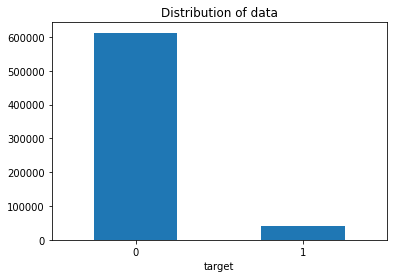

In [30]:
import matplotlib.pyplot as plt

# Plotting the distribution for dataset.
ax = train_df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['0','1'], rotation=0)

Hence, we need to balance the data some how.

- As the data is in string so we cannot do balancing of data right now.
- We cannot duplicate the data here as in that case we will affect the vectorisation of the base data (We tried but that didn't work well).
- Now we will first vectorize the data and then use balancing data techniques.

In [31]:
# from imblearn.over_sampling import SMOTE 

# sm = SMOTE(random_state=23, sampling_strategy=1.0)
# X_train_sm, y_train_sm = sm.fit_resample(train_df['question_text'], train_df['target'])
# print(len(X_train_sm), len(y_train_sm))

# Above cannot be used here as they are in string format
# -----------------------------------------------------------------------------------------------------------

# minority_class = train_df[train_df['target']==1]
# majority_class = train_df[train_df['target']==0]
# for i in range(14):
#     train_df = train_df.append(minority_class, ignore_index=True)

# print(train_df.shape)
# train_df=train_df.sample(frac=1).reset_index(drop=True)
# print(train_df.shape)
# print(train_df.shape)
# print(minority_class.shape)
# print(majority_class.shape)
# print(minority_class[0:100])

In [32]:
# ax = train_df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# ax.set_xticklabels(['0','1'], rotation=0)

### Cleaning the data

- Like removing !?., etc.
- converting sentences to lower case

In [33]:
sentences = train_df['question_text'].tolist()
N = len(sentences)
sentences = sentences[0:N]

In [34]:
i=0
for sentence in sentences:
    temp = re.sub('[^a-zA-Z]', ' ', sentence)
    temp = temp.lower()
    new_sentence = temp.split()
    new_sentence = ' '.join(new_sentence)
    sentences[i] = new_sentence
    # print(new_sentence)
    i+=1

### Lemmatization
- We need to perform Stemming and Lemmatization on the sentences. Lemmatization is prefered as of now (Converting to meaningful words).

In [35]:
lemmatizer = WordNetLemmatizer()

tokenized_sentences = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence)

    # removing stop words and using list composition 
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]

    # joining words using spaces
    tokenized_sentences.append(' '.join(words))

sentences = tokenized_sentences
# print(sentences)

## Saving The PreProcessed Data

In [36]:
Y1 = train_df['target'].to_numpy().astype(np.float64)
Y1 = Y1[:N]

data = [["question_text","target"]]
for i in range(N):
  data.append([sentences[i],Y1[i]])

import csv

with open('processed_train_data.csv','w',newline='') as fp:
  a = csv.writer(fp, delimiter=',')
  a.writerows(data)